In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

insurance_df = pd.read_csv(r"C:\Users\DELL\Downloads\92105_Soft and Hard Hybrid Modelling for Insurance Cost Prediction\92105_Soft and Hard Hybrid Modelling for Insurance Cost Prediction\Code\insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
print("Insurance Cost Data Shape:",insurance_df.shape)
print("\nInformation of Insurance Cost:\n")
insurance_df.info()
print("\nStatistical Analysis of Insurance Cost:\n")
insurance_df.describe()

Insurance Cost Data Shape: (1338, 7)

Information of Insurance Cost:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Statistical Analysis of Insurance Cost:



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_df['charges'].value_counts()

,count
charges,
1639.56310,2
2221.56445,1
19798.05455,1
13063.88300,1
13555.00490,1
...,...
1149.39590,1
37079.37200,1
4738.26820,1


### Dropping Null and Duplicates

In [7]:
print("NaN values present in Insurance Cost: ",insurance_df.isnull().values.sum())
print("Duplicates present in Insurance Cost: ",insurance_df.duplicated().sum())
insurance_df = insurance_df.drop_duplicates(keep='first')
print("Final Duplicates Count: ",insurance_df.duplicated().sum())

NaN values present in Insurance Cost:  0
Duplicates present in Insurance Cost:  1
Final Duplicates Count:  0


### Visualization of Numeric Columns

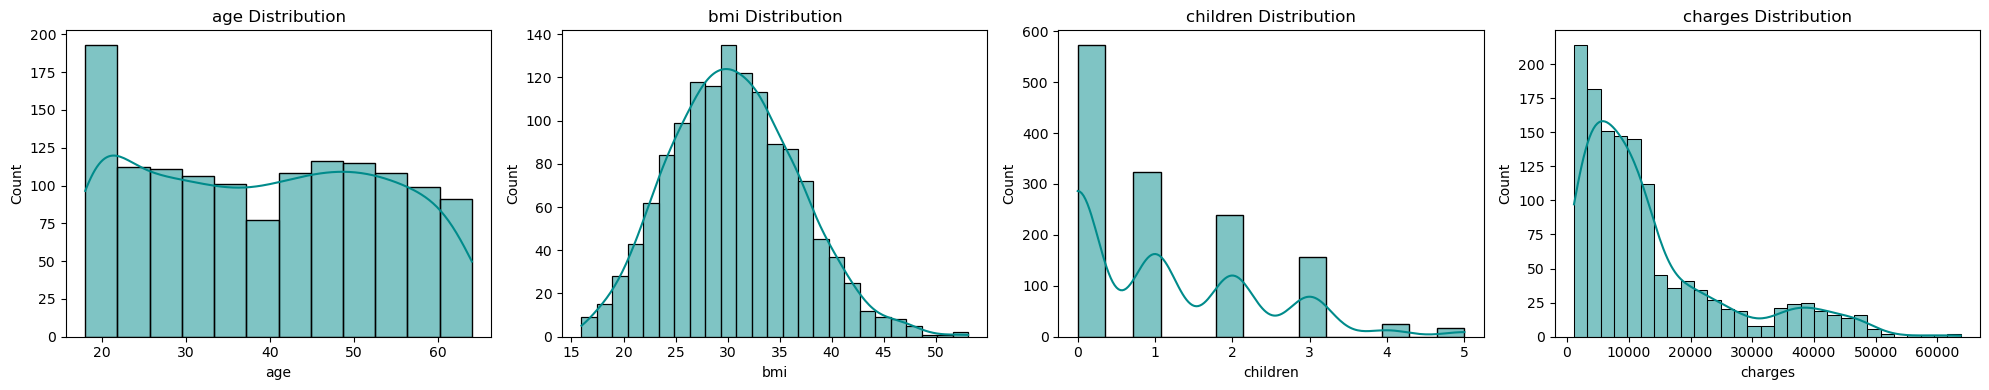

In [8]:
# Selecting all the numerical columns (int and float)
numeric_cols = insurance_df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(5 * len(numeric_cols), 4))
for j, col in enumerate(numeric_cols):
    sns.histplot(insurance_df[col], kde=True, ax=axes[j], color='darkcyan')
    axes[j].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

### Visualization of Object Columns

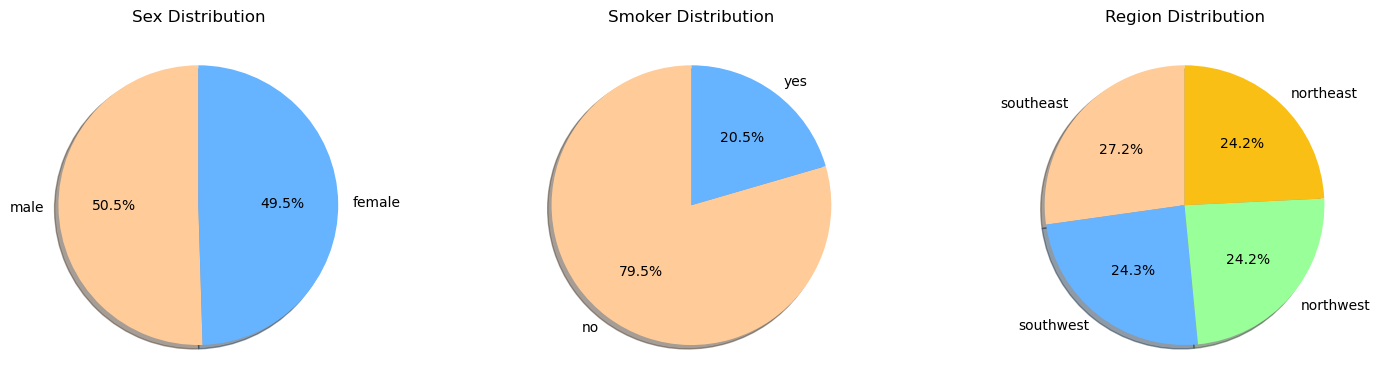

In [9]:
# Selecting all the object columns
object_columns = insurance_df.select_dtypes(include='object').columns

fig, axes = plt.subplots(1, len(object_columns), figsize=(5 * len(object_columns), 4))
for j, col in enumerate(object_columns):
    insurance_df[col].value_counts().plot.pie(
        ax=axes[j],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=['#ffcc99', '#66b3ff', '#99ff99', '#fabf15']
    )
    axes[j].set_title(f'{col.capitalize()} Distribution')
    axes[j].set_ylabel('')  # Hide y-axis label

plt.tight_layout()
plt.show()
